In [1]:
# importing required libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
## laoding the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# checking the shape of dataset
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we have 891 rows and 12 attribute including target attribute.

Survived is our target attribute.

This is a classification problem statement.

In [5]:
# checking data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In our dataset 5 attribute have object datatype.

we have 7 attribute of numeric datatype.

out of 7 numerical attributes we have Age and fare which have float datatype.

In [6]:
#printing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1-- Null values present in cabin,Embarked and Age columns.

2-- We need to check all as there could be some erroneous data present.

In [7]:
# checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#getting percentage of null values present in data
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Cabin consist 77% of Null Data.

<AxesSubplot:title={'center':'Null values '}>

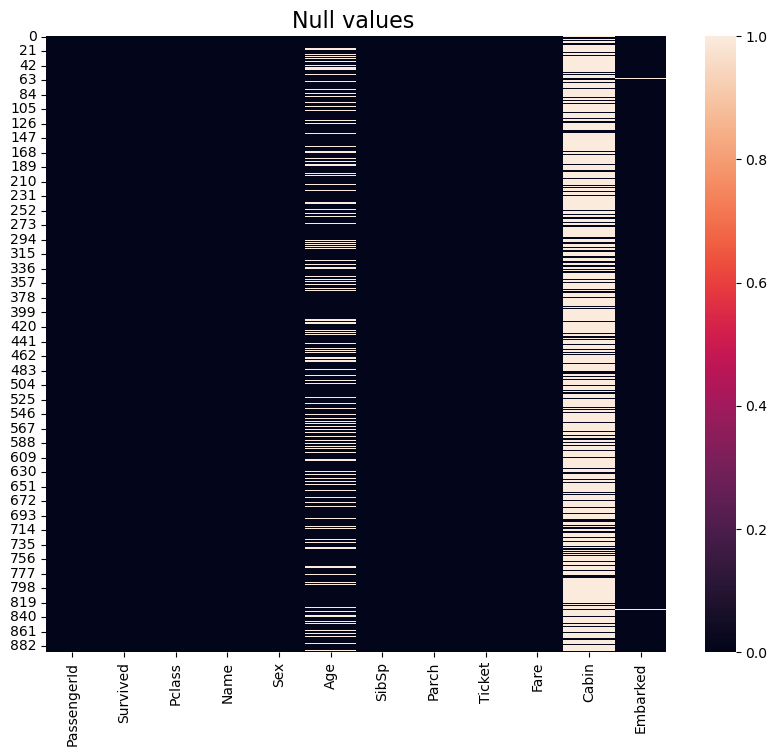

In [9]:
#ploting dataset for double check null values
plt.figure(figsize=(10,8))
plt.title('Null values ',fontsize=16)
sns.heatmap(df.isnull())

In [10]:
#stats summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age and fare only Float datatype in our dataset.

Age is normally distributed but fare is right skewed (mean>median>mode).

outliers could also present in fare Attribute also.

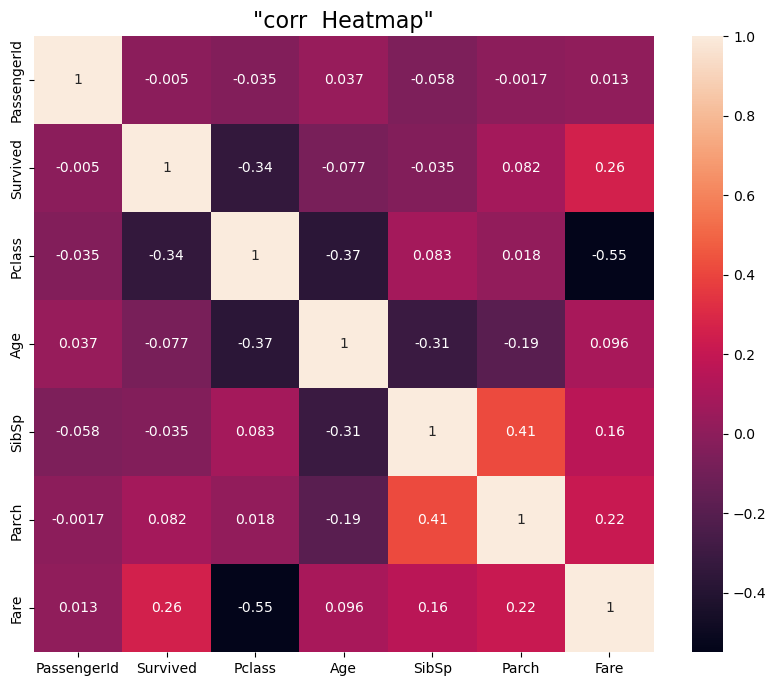

In [11]:
# correlation
plt.figure(figsize=(10,8))
plt.title('"corr  Heatmap"',fontsize=16)
sns.heatmap(df.corr(),annot=True);

we can see there may be correlation between Pclass and Fare. But one is categorical and one is continuous so we can't drop any of them basis on their correlation.

<AxesSubplot:title={'center':'Correlation With target'}>

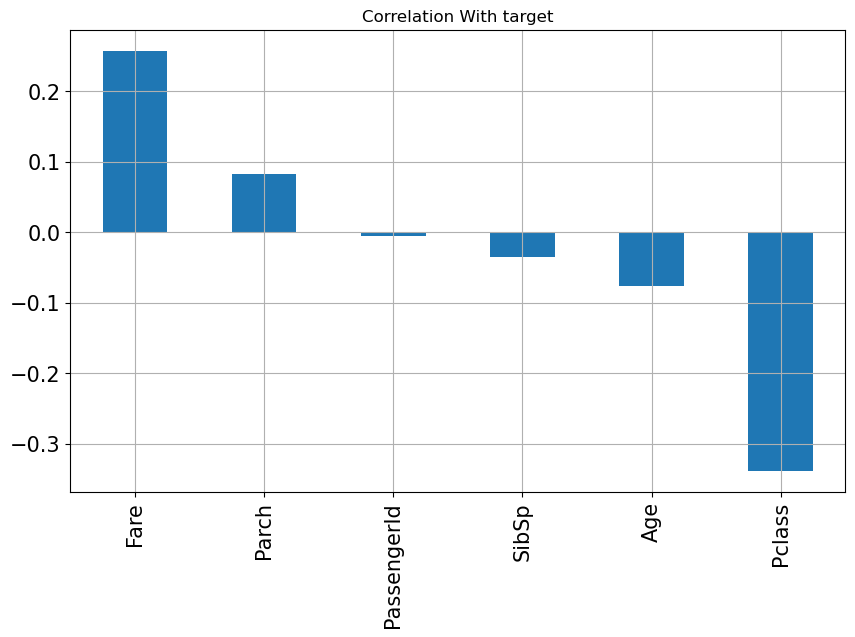

In [12]:
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot.bar(figsize=(10,6),grid=True,title='Correlation With target',fontsize=15)

we can see that Fare and Parch are postively correlated with Survived columns

Passengerid has no significance to predict whether person had survived or not.

Sibsp,Age and are negatively correlated to our Survived column.

Pclass have a inverse impact on survived attribute, as Pclass is highly negatively correlated with Target.

# fixing missing values

In [13]:
#checking values count for emabrked col
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df['Age']=df['Age'].fillna(df['Age'].mean()) ## Age is normally distributed so we impute mean value
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0]) ## Embarked is object data type. we will put mode of the given category.


## we will drop non significant attributed for our Target Attribute such as passengerID, Name, Ticket.
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [16]:
#once Again Checking misssing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Missing values sucessfully fill

# Data Visualization

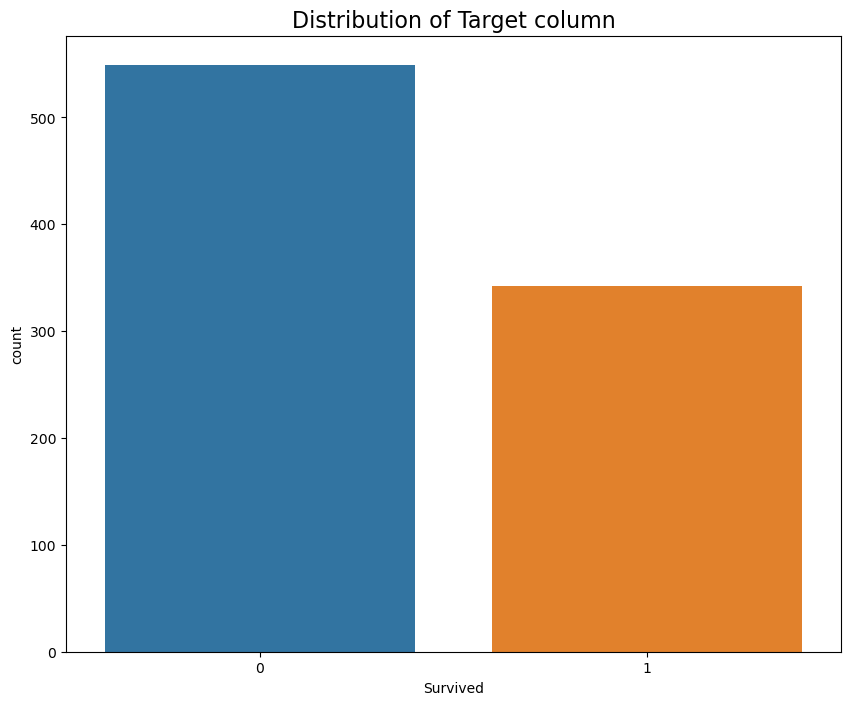

In [17]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Target column',fontsize=16)
sns.countplot(df['Survived'],data=df);

our Target attribute is not imbalanced.

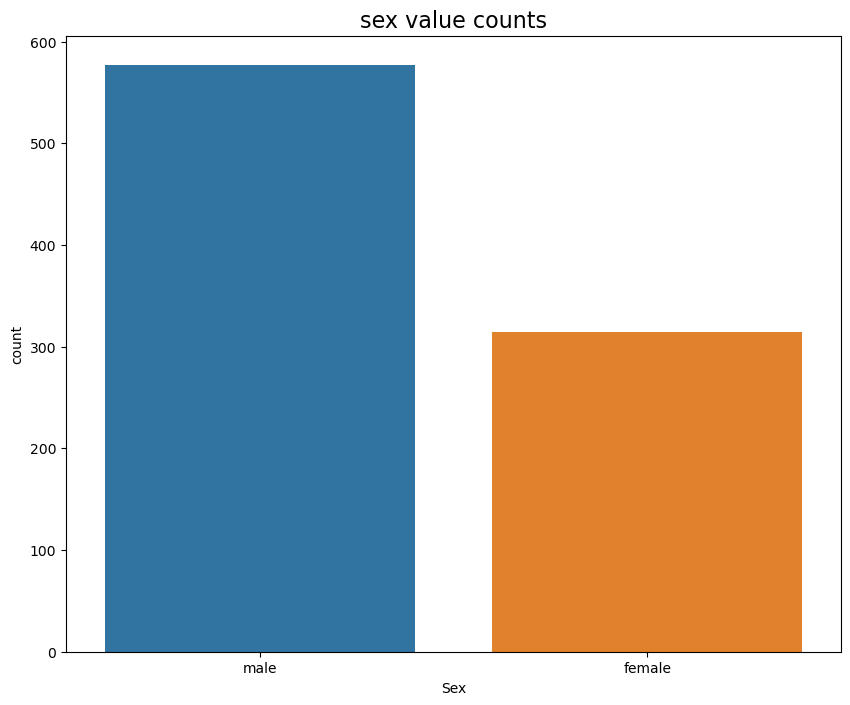

In [18]:
plt.figure(figsize=(10,8))
plt.title("sex value counts",fontsize=16)
sns.countplot(df['Sex'],data=df);

Number of male passengers are higher than the Female passenger.

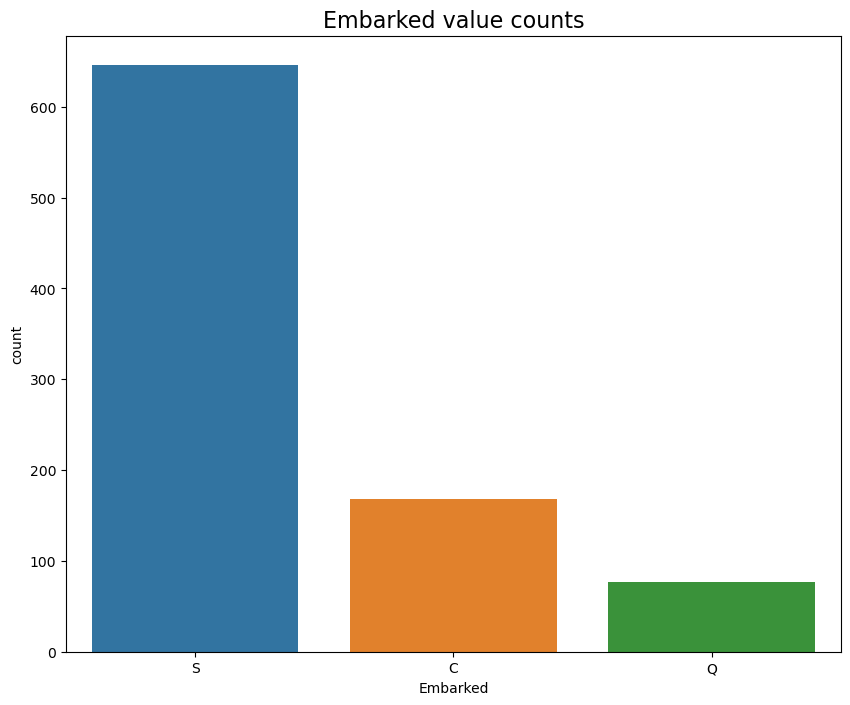

In [19]:
plt.figure(figsize=(10,8))
plt.title('Embarked value counts',fontsize=16)
sns.countplot(df['Embarked'],data=df);

most of passengers were get on ship from S

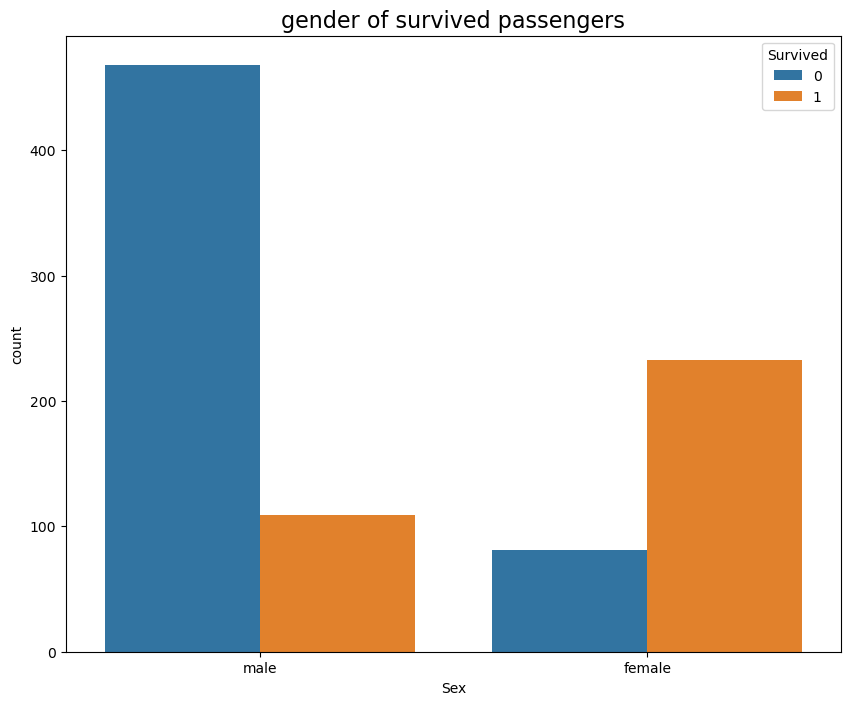

In [20]:
plt.figure(figsize=(10,8))
plt.title('gender of survived passengers',fontsize=16)
sns.countplot(df['Sex'],hue='Survived',data=df);

female were survived mostly.

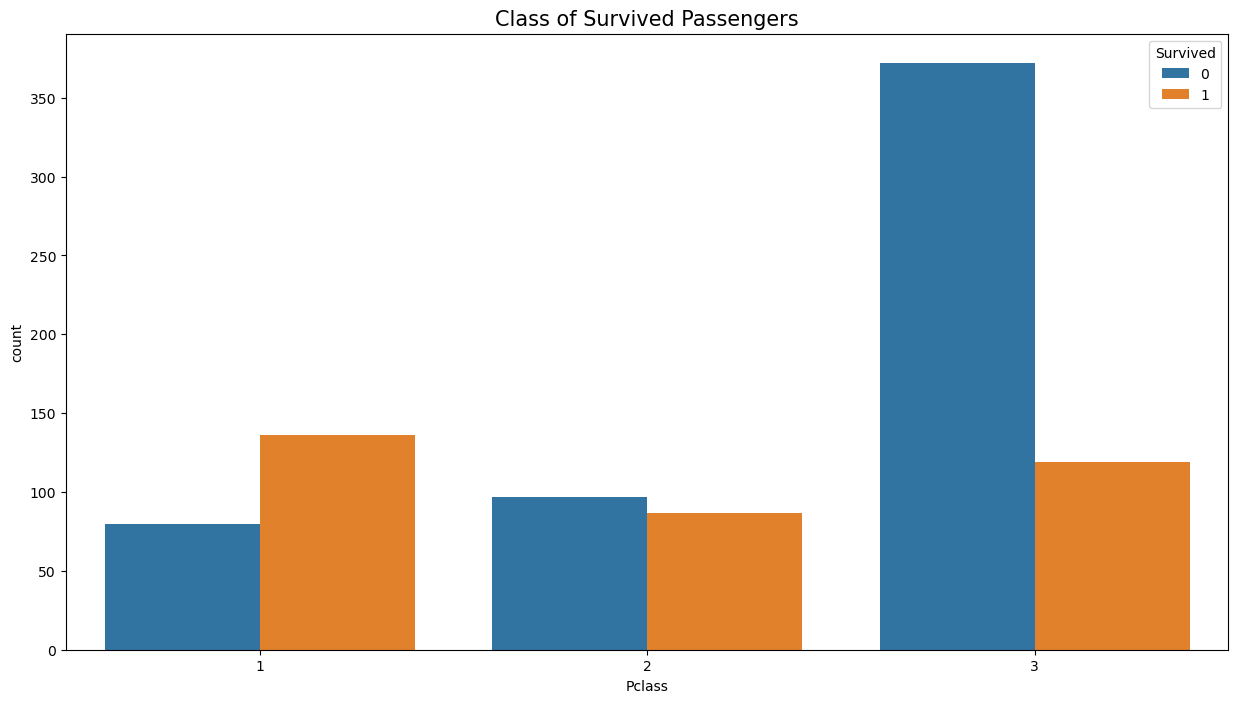

In [21]:
plt.figure(figsize=(15,8))
plt.title('Class of Survived Passengers',fontsize=15)
sns.countplot(df['Pclass'],hue='Survived',data=df);

we can see the wealthy peeps who belongs to class 1 survived mostly
peeps who bought ticket of third class died mostly

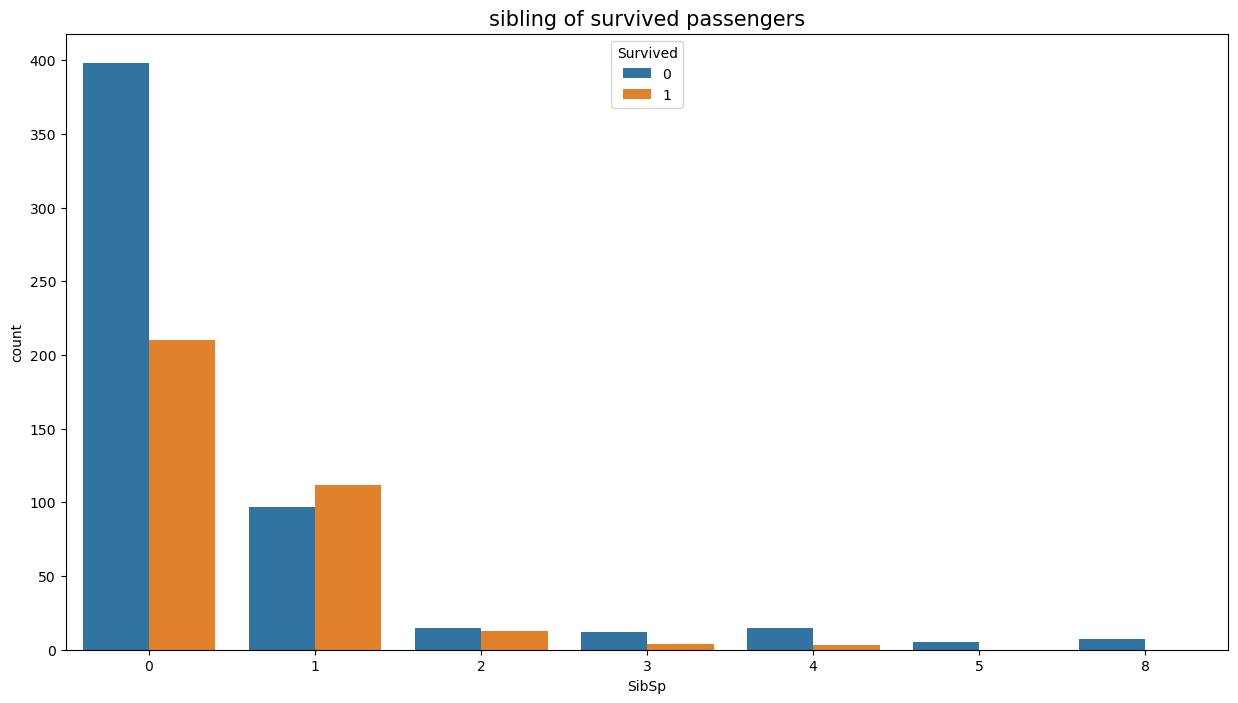

In [22]:
plt.figure(figsize=(15,8))
plt.title('sibling of survived passengers',fontsize=15)
sns.countplot(df['SibSp'],hue='Survived',data=df);

we can see that familes with 0 or one sibs are survived more

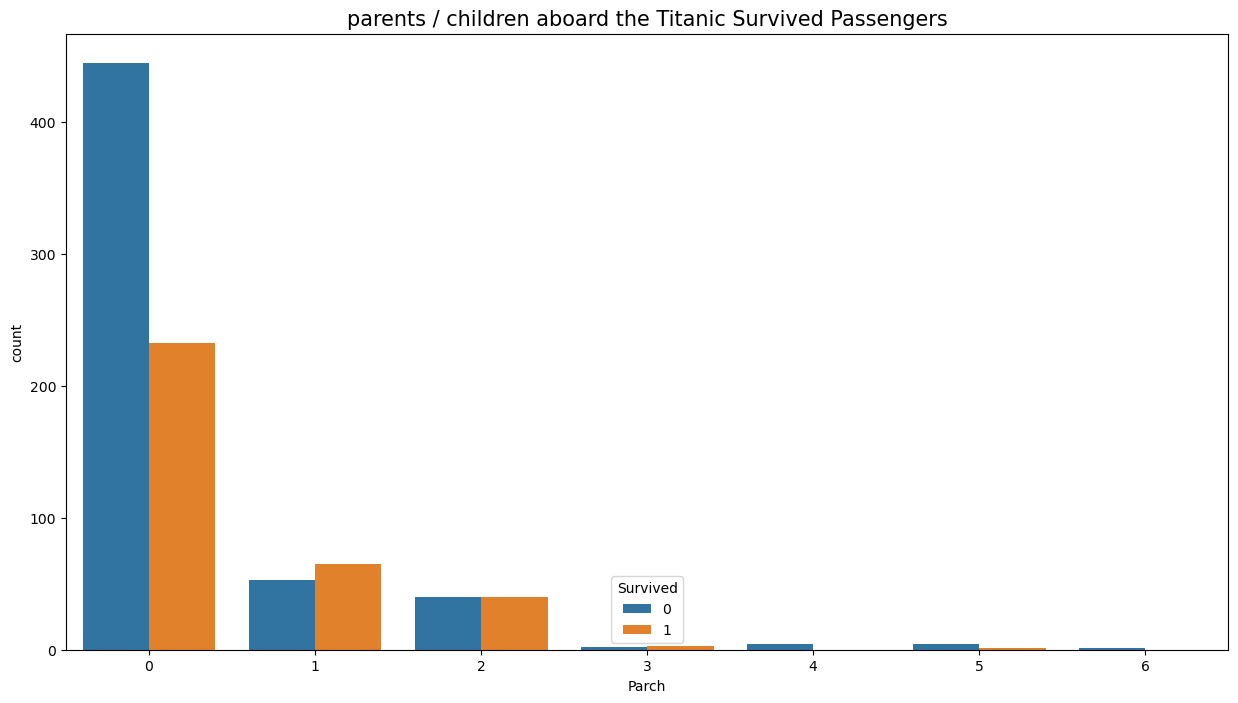

In [23]:
plt.figure(figsize=(15,8))
plt.title('parents / children aboard the Titanic Survived Passengers',fontsize=15)
sns.countplot(df['Parch'],hue='Survived',data=df);

the similer trend as above. people who travel alone have highest chance for survival.

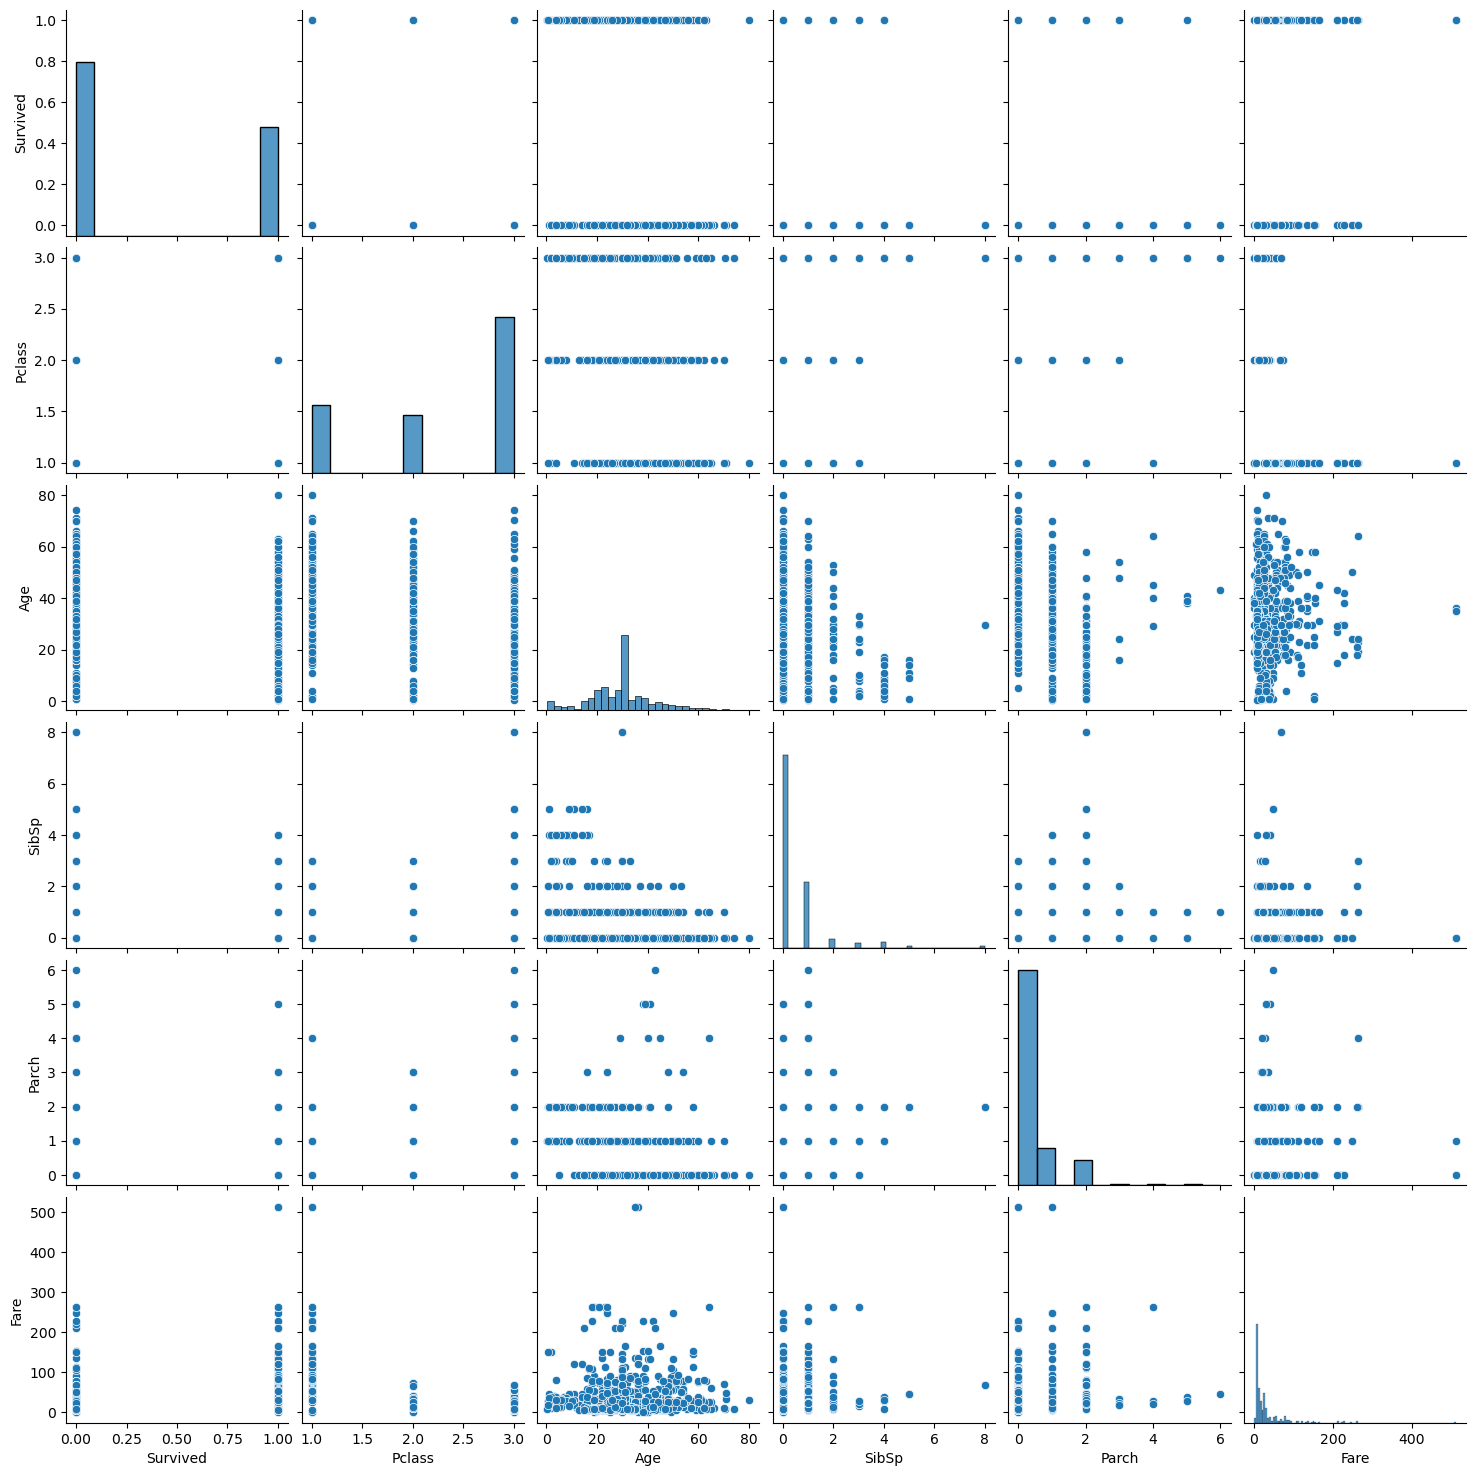

In [24]:
# ploting pairplot
sns.pairplot(df);

# checking Data distribution

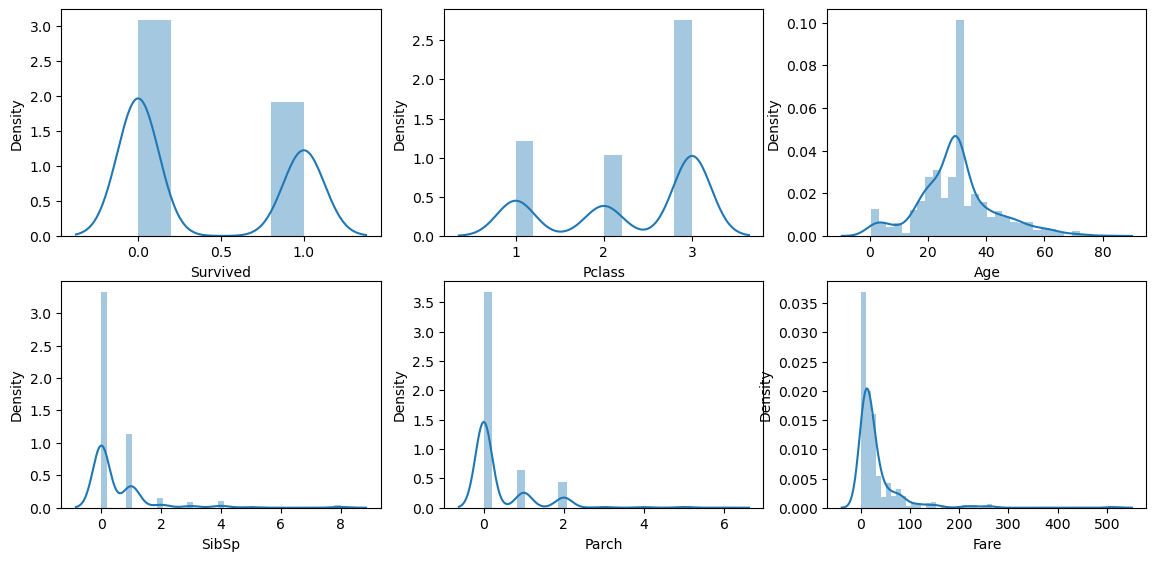

In [25]:
di=df.select_dtypes(exclude='object')
plt.figure(figsize=(14,10))
plot=1
for col in di:
    if plot<=13:
        plt.subplot(3,3,plot)
        sns.distplot(di[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

1-Here Survived, Pclass,Sibsp,Parch are encoded labels so we don't need to perform any operation here.

2-Age anf fare only float datatype in which Age i normally distributed but Fare is Right skewed.

3- We know from our domain knowledge that fare,Salary always remain right skewed in nature.

# now time to check outliers

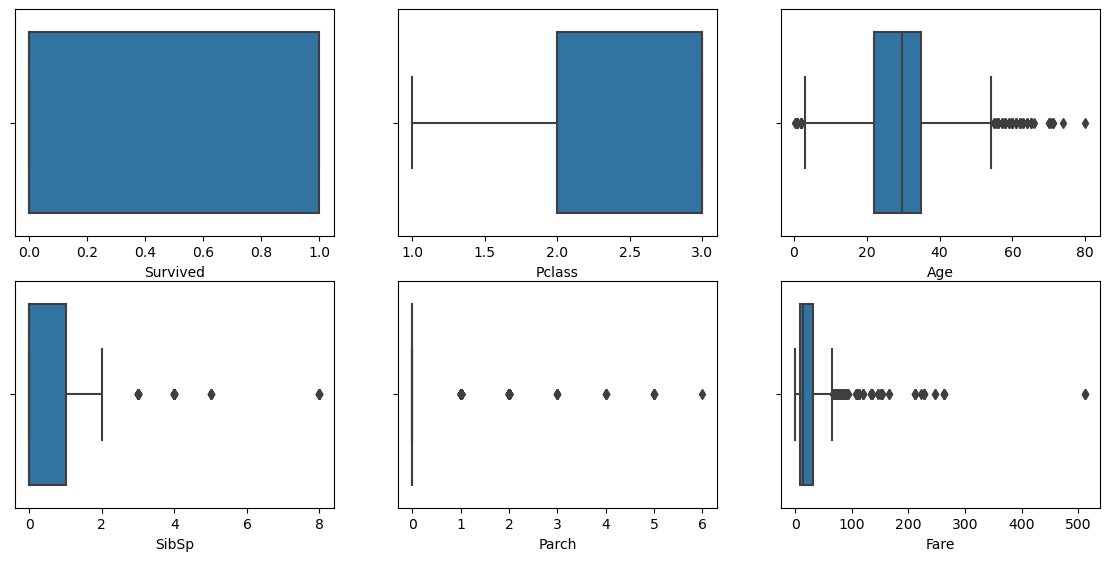

In [26]:
plt.figure(figsize=(14,10))
plot=1
for col in di:
    if plot<=13:
        plt.subplot(3,3,plot)
        sns.boxplot(di[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

1-Parch,sibSp are categorcial in nature which are encoded in our data so we won't perform any operation here.

2-If we see the outliers in Age and fare, We can see that Outliers in Age are very near to the uppper & Lower Whisker.

3-We can perform different operations here to handle these outliers.



In [27]:
## If our data in Skewed in Nature
# function for outliers
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

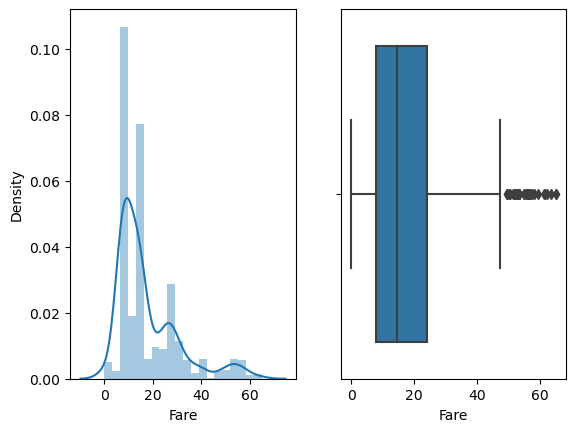

In [28]:
replace_outlier(df,'Fare')

In [29]:
## For normally Distributed Data.
# if our data is normally distributed 
def outlier_normally(df,col):
    Lower_boundary=df[col].mean()*-3*df[col].std()
    upper_boundary=df[col].mean()* +3*df[col].std()
    non_outlier=np.where((df[col]<Lower_boundary)|(df[col]>upper_boundary),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    

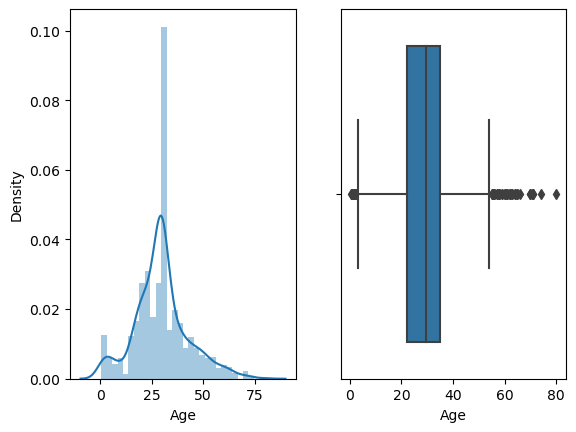

In [30]:
outlier_normally(df,'Age')

sucessfully treated outliers

# Skewness

In [31]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        1.616669
dtype: float64

In [32]:
df1 =df.copy()

In [33]:
df1['Fare']=np.cbrt(df1['Fare'])
df1['Parch']=np.sqrt(df1['Parch'])
df1['SibSp']=np.cbrt(df1['SibSp'])

In [34]:
df1.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       1.033059
Parch       1.529799
Fare       -0.310377
dtype: float64

sucessfully removed skewness

In [35]:
# time to encoding
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0.0,1.935438,S
1,1,1,female,38.0,1.0,0.0,2.435929,C
2,1,3,female,26.0,0.0,0.0,1.993730,S
3,1,1,female,35.0,1.0,0.0,3.758647,S
4,0,3,male,35.0,0.0,0.0,2.004158,S


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Sex']=le.fit_transform(df1['Sex'])
df1['Embarked']=le.fit_transform(df1['Embarked'])

In [37]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,1.935438,2
1,1,1,0,38.0,1.0,0.0,2.435929,0
2,1,3,0,26.0,0.0,0.0,1.993730,2
3,1,1,0,35.0,1.0,0.0,3.758647,2
4,0,3,1,35.0,0.0,0.0,2.004158,2


In [38]:
# splitting data into X and Y

x= df1.drop(['Survived'],axis=1)
y= df1[['Survived']]

In [39]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1.0,0.000000,1.935438,2
1,1,0,38.000000,1.0,0.000000,2.435929,0
2,3,0,26.000000,0.0,0.000000,1.993730,2
3,1,0,35.000000,1.0,0.000000,3.758647,2
4,3,1,35.000000,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0.0,0.000000,2.351335,2
887,1,0,19.000000,0.0,0.000000,3.107233,2
888,3,0,29.699118,1.0,1.414214,2.862294,2
889,1,1,26.000000,0.0,0.000000,3.107233,0


In [40]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


We have converted our Whole data in numeric Format.

In [41]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,1.187523,-0.539747,-0.828370,0.585954
1,-1.566107,-1.355574,0.638789,1.187523,-0.539747,-0.018183,-1.942303
2,0.827377,-1.355574,-0.284663,-0.660582,-0.539747,-0.734008,0.585954
3,-1.566107,-1.355574,0.407926,1.187523,-0.539747,2.123013,0.585954
4,0.827377,0.737695,0.407926,-0.660582,-0.539747,-0.717128,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.660582,-0.539747,-0.155123,0.585954
887,-1.566107,-1.355574,-0.823344,-0.660582,-0.539747,1.068513,0.585954
888,0.827377,-1.355574,0.000000,1.187523,2.061805,0.672011,0.585954
889,-1.566107,0.737695,-0.284663,-0.660582,-0.539747,1.068513,-1.942303


In [42]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

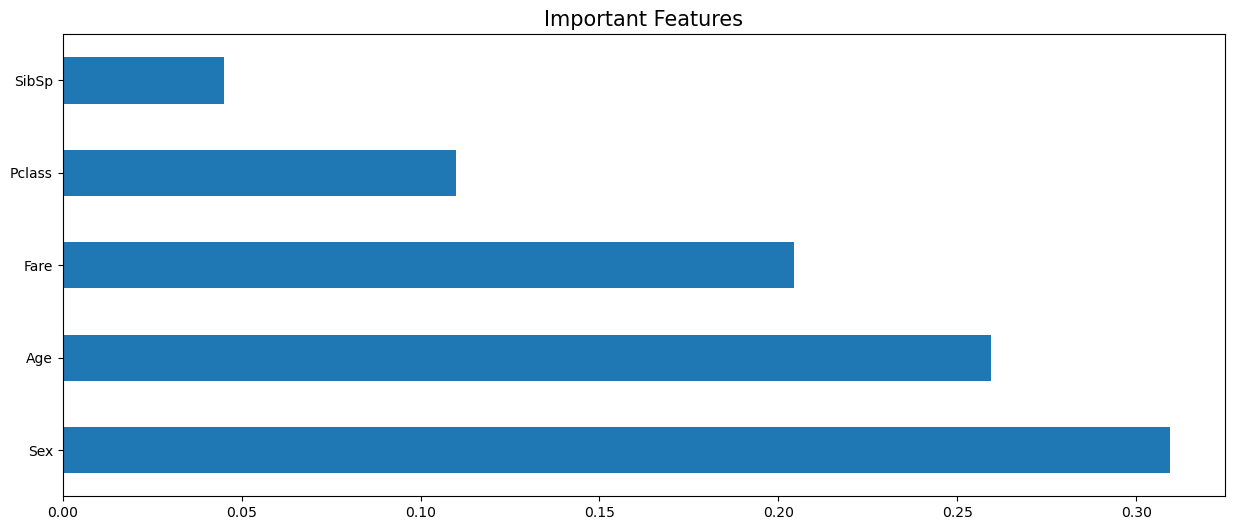

In [43]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

We can clearly see that Sex, Age and fare of ticket is very important Features to decide passenger Survival.

In [44]:
# time to create models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [45]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max Accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    return final_r

# Logistic Regression

In [46]:
lg=LogisticRegression()
max_accuracy_score(lg,x,y)

max Accuracy score corresponding to 54 is 0.8435754189944135


cross validation score 0.7867679367271359


Standard Deviation 0.012087426670650289


Training accuracy 0.7921348314606742


Test Accuracy 0.7877094972067039


Confusion Matrix [[88 22]
 [16 53]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.80      0.82       110
           1       0.71      0.77      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Roc_auc Score 0.7840579710144927


54

# DecisionTreeClassifier

In [47]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max Accuracy score corresponding to 71 is 0.8491620111731844


cross validation score 0.7744272173749294


Standard Deviation 0.017676716896695147


Training accuracy 0.9859550561797753


Test Accuracy 0.7430167597765364


Confusion Matrix [[84 26]
 [20 49]]


Classification Report               precision    recall  f1-score   support

           0       0.81      0.76      0.79       110
           1       0.65      0.71      0.68        69

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.74      0.74       179



Roc_auc Score 0.7368906455862978


71

# K-Nearest Neighbour

In [48]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max Accuracy score corresponding to 99 is 0.8770949720670391


cross validation score 0.8193396522503296


Standard Deviation 0.03780139028891189


Training accuracy 0.8525280898876404


Test Accuracy 0.8770949720670391


Confusion Matrix [[100  10]
 [ 12  57]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.91      0.90       110
           1       0.85      0.83      0.84        69

    accuracy                           0.88       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



Roc_auc Score 0.8675889328063241


99

# Naive Bayes

In [49]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max Accuracy score corresponding to 73 is 0.8324022346368715


cross validation score 0.7733350072186302


Standard Deviation 0.022072510888138278


Training accuracy 0.7808988764044944


Test Accuracy 0.776536312849162


Confusion Matrix [[82 28]
 [12 57]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.75      0.80       110
           1       0.67      0.83      0.74        69

    accuracy                           0.78       179
   macro avg       0.77      0.79      0.77       179
weighted avg       0.79      0.78      0.78       179



Roc_auc Score 0.7857707509881423


73

# Support Vector Classifier

In [50]:
svc=SVC()
max_accuracy_score(svc,x,y)

max Accuracy score corresponding to 88 is 0.8715083798882681


cross validation score 0.8170736300295023


Standard Deviation 0.025161018931360423


Training accuracy 0.8342696629213483


Test Accuracy 0.8435754189944135


Confusion Matrix [[98 12]
 [16 53]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



Roc_auc Score 0.8295125164690381


88

# random Forest Classifier

In [51]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max Accuracy score corresponding to 88 is 0.8715083798882681


cross validation score 0.8058565061829139


Standard Deviation 0.026713800797104437


Training accuracy 0.9859550561797753


Test Accuracy 0.8212290502793296


Confusion Matrix [[95 15]
 [17 52]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Roc_auc Score 0.8086297760210804


88

# Adaboost

In [52]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max Accuracy score corresponding to 73 is 0.8715083798882681


cross validation score 0.8081162513338775


Standard Deviation 0.02540515904450203


Training accuracy 0.8356741573033708


Test Accuracy 0.8156424581005587


Confusion Matrix [[91 19]
 [14 55]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.74      0.80      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Roc_auc Score 0.8121870882740447


73

# gradient Boost Classifier

In [53]:
gbc=GradientBoostingClassifier()
max_accuracy_score(gbc,x,y)

max Accuracy score corresponding to 66 is 0.8659217877094972


cross validation score 0.8193459293201932


Standard Deviation 0.025108632537847595


Training accuracy 0.8946629213483146


Test Accuracy 0.8268156424581006


Confusion Matrix [[98 12]
 [19 50]]


Classification Report               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



Roc_auc Score 0.8077733860342556


66

it is clear that Gradient Boosting Classifier if our best model because the difference between accuracy score and Cross validation score is minimum which shows that our Model is not overfit and best among all.

# Hyperparameter Tuning of Gradient Boosting Classifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=.20)
gradient=GradientBoostingClassifier()
param={'loss':['deviance','exponential'],'n_estimators':[64,50,100,200],'learning_rate':[.001,.01,.1,1,1.2],'max_depth':[10,50,None],'max_features':[4,5,8]}
glf=GridSearchCV(estimator=gradient,param_grid=param,scoring='accuracy',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

In [ ]:
gradient=GradientBoostingClassifier(learning_rate=.01,loss='deviance',max_depth=10,max_features=4,n_estimators=50)
gradient.fit(x_train,y_train)
pred=gradient.predict(x_test)
print('\n')
print('Accuracy Score',accuracy_score(y_test,pred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report')
print(classification_report(y_test,pred))
print('\n')
print('Roc_auc Score',roc_auc_score(y_test,pred))

we have improved our accuracy score so we will save this as our best model.

# Saving Model

In [ ]:
import joblib
joblib.dump(gradient,'titanic_grad.pkl')

# Loading Model

In [ ]:
loaded_model=joblib.load('titanic_grad.pkl')
loaded_model

In [ ]:
prediction=loaded_model.predict(x_test)
prediction